Data Preprocessing with scikit-learn:
-----------------------------------------------------
- Data Preprocessing is a technique that is used to convert the raw data into a clean data set
### Steps:
- loading the data (reading files)
- exploring the data (summarizing)
- cleaning data (handling missing data)
- transforming data 
    - this scikit-learn library includes tools for data preprocessing and data mining

Data Imputation:
-------------------------
- if the dataset is missing too many values, we just dont use it
- if onlya few of the values are missing, we can perform data imputation to substitute the missing data with someother value(s).
- Different methods for data imputation are
    - using the mean value
    - using the median value
    - using the most frequent value
    - filling the missing value with a constant

Feature Scaling:
------------------------
>1. Standardizing data
- example: distance (cm,m,km,miles)
- Data scientists converts the data into a standard format to make it easier to understand
- The standard format refers to data that has 0 mean and unit variance(standard deviation=1), and the process of converting data into this format is called  data standardization.
- improves the performance of models
- It rescales the data to have mean as 0 and variance as 1
- formula for this x-mean/standard deviation

>2. Data Range
- Scale data by compressing it into a fixed range
- One of the biggest use cases for compressing data into the range[0,1]
- MinMaxScaler

>3. Normalizing Data
- wants to scale the individual data observations(i.e. rows)
- Used in data mining and classification related problems
- When clustering data we need to apply L2 Normalization
- L2 normalization of a row is just the square root of the sum of squared values for the row

>4. Robust Scaling
- Deals with outliers(data point that is significantly further away from the other data points)
- Robustly scale the data i.e. avoid being affected by outliers
- Scaling by using data's median and Interquartile range(IQR)
- Here mean affected but median remains same
- subract the median from each data value then scale to the IQR

In [1]:
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer
# ! pip install sklearn

In [2]:
d = { "a":pd.Series([12,34,45,np.nan,56],index=[1,2,3,4,5]),
     "b": pd.Series([90,89,78,89],index=[1,3,4,5]),
     "c":pd.Series([13,45,35,35],index=[1,2,3,4])
    }
df = pd.DataFrame(d)
df

,a,b,c
1,12.0,90.0,13.0
2,34.0,NaN,45.0
3,45.0,89.0,35.0
4,NaN,78.0,35.0
5,56.0,89.0,NaN


In [3]:
si = SimpleImputer(strategy = "median")
si.fit_transform(df)

array([[12. , 90. , 13. ],
       [34. , 89. , 45. ],
       [45. , 89. , 35. ],
       [39.5, 78. , 35. ],
       [56. , 89. , 35. ]])

In [4]:
df.median()

a    39.5
b    89.0
c    35.0
dtype: float64

In [5]:
si = SimpleImputer(strategy = "mean")
si.fit_transform(df)

array([[12.  , 90.  , 13.  ],
       [34.  , 86.5 , 45.  ],
       [45.  , 89.  , 35.  ],
       [36.75, 78.  , 35.  ],
       [56.  , 89.  , 32.  ]])

In [6]:
df.mean()

a    36.75
b    86.50
c    32.00
dtype: float64

In [7]:
si = SimpleImputer(strategy = "most_frequent")
si.fit_transform(df)

array([[12., 90., 13.],
       [34., 89., 45.],
       [45., 89., 35.],
       [12., 78., 35.],
       [56., 89., 35.]])

In [8]:
si = SimpleImputer(strategy = "constant",fill_value = -1)
si.fit_transform(df)

array([[12., 90., 13.],
       [34., -1., 45.],
       [45., 89., 35.],
       [-1., 78., 35.],
       [56., 89., -1.]])

1. Standardizing data

In [12]:
adv = pd.read_csv("https://raw.githubusercontent.com/ikkurthipoojitha/Data-Analysis-using-Python/main/Datasets/Advertising.csv")
adv.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


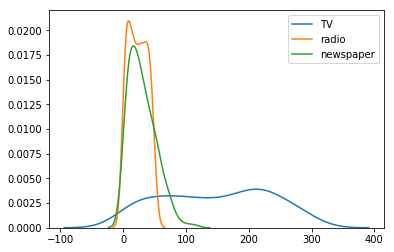

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.kdeplot(adv["TV"])
sns.kdeplot(adv["radio"])
sns.kdeplot(adv["newspaper"])
plt.show()

In [15]:
# std_data  = (x - mean(x))/std(x)
(adv["TV"][0]-adv["TV"].mean()) / adv["TV"].std()

0.9674245973763037

In [16]:
from sklearn.preprocessing import scale
scl = scale(adv)
scl

array([[ 9.69852266e-01,  9.81522472e-01,  1.77894547e+00,
         1.55205313e+00],
       [-1.19737623e+00,  1.08280781e+00,  6.69578760e-01,
        -6.96046111e-01],
       [-1.51615499e+00,  1.52846331e+00,  1.78354865e+00,
        -9.07405869e-01],
       [ 5.20496822e-02,  1.21785493e+00,  1.28640506e+00,
         8.60330287e-01],
       [ 3.94182198e-01, -8.41613655e-01,  1.28180188e+00,
        -2.15683025e-01],
       [-1.61540845e+00,  1.73103399e+00,  2.04592999e+00,
        -1.31091086e+00],
       [-1.04557682e+00,  6.43904671e-01, -3.24708413e-01,
        -4.27042783e-01],
       [-3.13436589e-01, -2.47406325e-01, -8.72486994e-01,
        -1.58039455e-01],
       [-1.61657614e+00, -1.42906863e+00, -1.36042422e+00,
        -1.77205942e+00],
       [ 6.16042873e-01, -1.39530685e+00, -4.30581584e-01,
        -6.57617064e-01],
       [-9.45155670e-01, -1.17923146e+00, -2.92486143e-01,
        -1.04190753e+00],
       [ 7.90028350e-01,  4.96973404e-02, -1.22232878e+00,
      

In [18]:
scl_data = pd.DataFrame(scl,columns= adv.columns)
scl_data.head(5)

,TV,radio,newspaper,sales
0,0.969852,0.981522,1.778945,1.552053
1,-1.197376,1.082808,0.669579,-0.696046
2,-1.516155,1.528463,1.783549,-0.907406
3,0.052050,1.217855,1.286405,0.860330
4,0.394182,-0.841614,1.281802,-0.215683


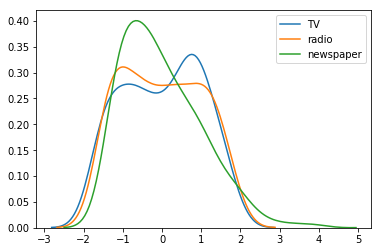

In [20]:
sns.kdeplot(scl_data["TV"])
sns.kdeplot(scl_data["radio"])
sns.kdeplot(scl_data["newspaper"])
plt.show()

In [22]:
scl_data.mean().round(3)

TV           0.0
radio       -0.0
newspaper    0.0
sales       -0.0
dtype: float64

In [24]:
scl_data.std().round(3)

TV           1.003
radio        1.003
newspaper    1.003
sales        1.003
dtype: float64

In [26]:
adv.mean()

TV           147.0425
radio         23.2640
newspaper     30.5540
sales         14.0225
dtype: float64

In [27]:
adv.std()

TV           85.854236
radio        14.846809
newspaper    21.778621
sales         5.217457
dtype: float64